# Проект: Исследовательский анализ данных. <br> Исследование объявлений о продаже квартир.
<a id="0"></a>
1. [Описание проекта](#1)  
2. [Первичный анализ данных](#2) <br>
   [Вывод](#11)
3. [Предобработка данных](#3) <br>
3.1. [Обработка пропусков](#4)<br>
3.2. [Изменение типов данных](#6)<br>
3.3. [Обработка дубликатов](#7)<br>
3.4. [Обработка аномальных значений](#5)<br>
     [Вывод](#8)
4. [Расчет дополнительных параметров](#10)<br>
     [Вывод](#17)
5. [Исследовательский анализ данных](#9)<br>
5.1. [Изучение выбранных параметров](#12)<br>
5.2. [Изучим как быстро продавались квартиры](#13)<br>
5.3. [Влияние факторов на стоимость объекта](#14)<br>
5.4. [Топ 10](#15)<br>
5.5. [Зависимость стоимости объектов от расстояния до центра города Санкт-Петербург](#16)<br>
6. [Общий вывод](#17)

## 1. Описание проекта <a id="1"></a>

**Цель исследования** <br>
   Провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов. Изучаемые параметры: общая площадь, жилая площадь, площадь кухни, количество комнат, этаж, дата размещения.<br>
Изучить, как быстро продавались квартиры, колько времени обычно занимает продажа. Определить какие продажи можно считать быстрыми, а какие — необычно долгими.<br>
Определить населённые пункты с самой высокой и низкой стоимостью квадратного метра.<br>
Определить как стоимость объектов зависит от расстояния до центра города Петербурга.

**Контекст исследования**<br>
Результаты исследования будут учтены при построении автоматизированной системы объявлений о продаже квартир, которая позволит отследить аномалии и мошенническую деятельность. 

**Входные данные**<br> 
Данные получены от сервиса Яндекс Недвижимость. В файле "real_estate_data.csv" содержится архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных: заполненные пользователем и полученые автоматически на основе картографических данных.

**План исследования**
1. Получение данных. Обзор и первичный анализ данных.
2. Предобработка данных.
3. Добавление новых показателей.
3. Исследовательский анализ данных.
4. Результаты исследования.

## 2. Первичный анализ данных.
<a id="2"></a>

In [1]:
pip install -q missingno;

Note: you may need to restart the kernel to use updated packages.


In [2]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
# Загрузка данных из csv-файла в датафрейм c помощью библиотеки pandas.
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [4]:
# Выведем первые 5 строчек датафрейма data на экран.
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Описание данных**<br>
`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)<br>
`balcony` — число балконов<br>
`ceiling_height` — высота потолков (м)<br>
`cityCenters_nearest` — расстояние до центра города (м)<br>
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)<br>
`first_day_exposition` — дата публикации<br>
`floor` — этаж<br>
`floors_total` — всего этажей в доме<br>
`is_apartment` — апартаменты (булев тип)<br>
`kitchen_area` — площадь кухни в квадратных метрах (м²)<br>
`last_price` — цена на момент снятия с публикации<br>
`living_area` — жилая площадь в квадратных метрах (м²)<br>
`locality_name` — название населённого пункта<br>
`open_plan` — свободная планировка (булев тип)<br>
`parks_around3000` — число парков в радиусе 3 км<br>
`parks_nearest` — расстояние до ближайшего парка (м)<br>
`ponds_around3000` — число водоёмов в радиусе 3 км<br>
`ponds_nearest` — расстояние до ближайшего водоёма (м)<br>
`rooms` — число комнат<br>
`studio` — квартира-студия (булев тип)<br>
`total_area` — общая площадь квартиры в квадратных метрах (м²)<br>
`total_images` — число фотографий квартиры в объявлении<br>

In [5]:
# Выведем основную информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
# Выведем количество пропущенных значений для каждого столбца
data_null = data.isna()
data_null.apply(['sum', 'mean']).transpose().style.format('{:.3f}').background_gradient(cmap='Blues', axis=0)

,sum,mean
total_images,0.000,0.000
last_price,0.000,0.000
total_area,0.000,0.000
first_day_exposition,0.000,0.000
rooms,0.000,0.000
ceiling_height,9195.000,0.388
floors_total,86.000,0.004
living_area,1903.000,0.080
floor,0.000,0.000
is_apartment,20924.000,0.883


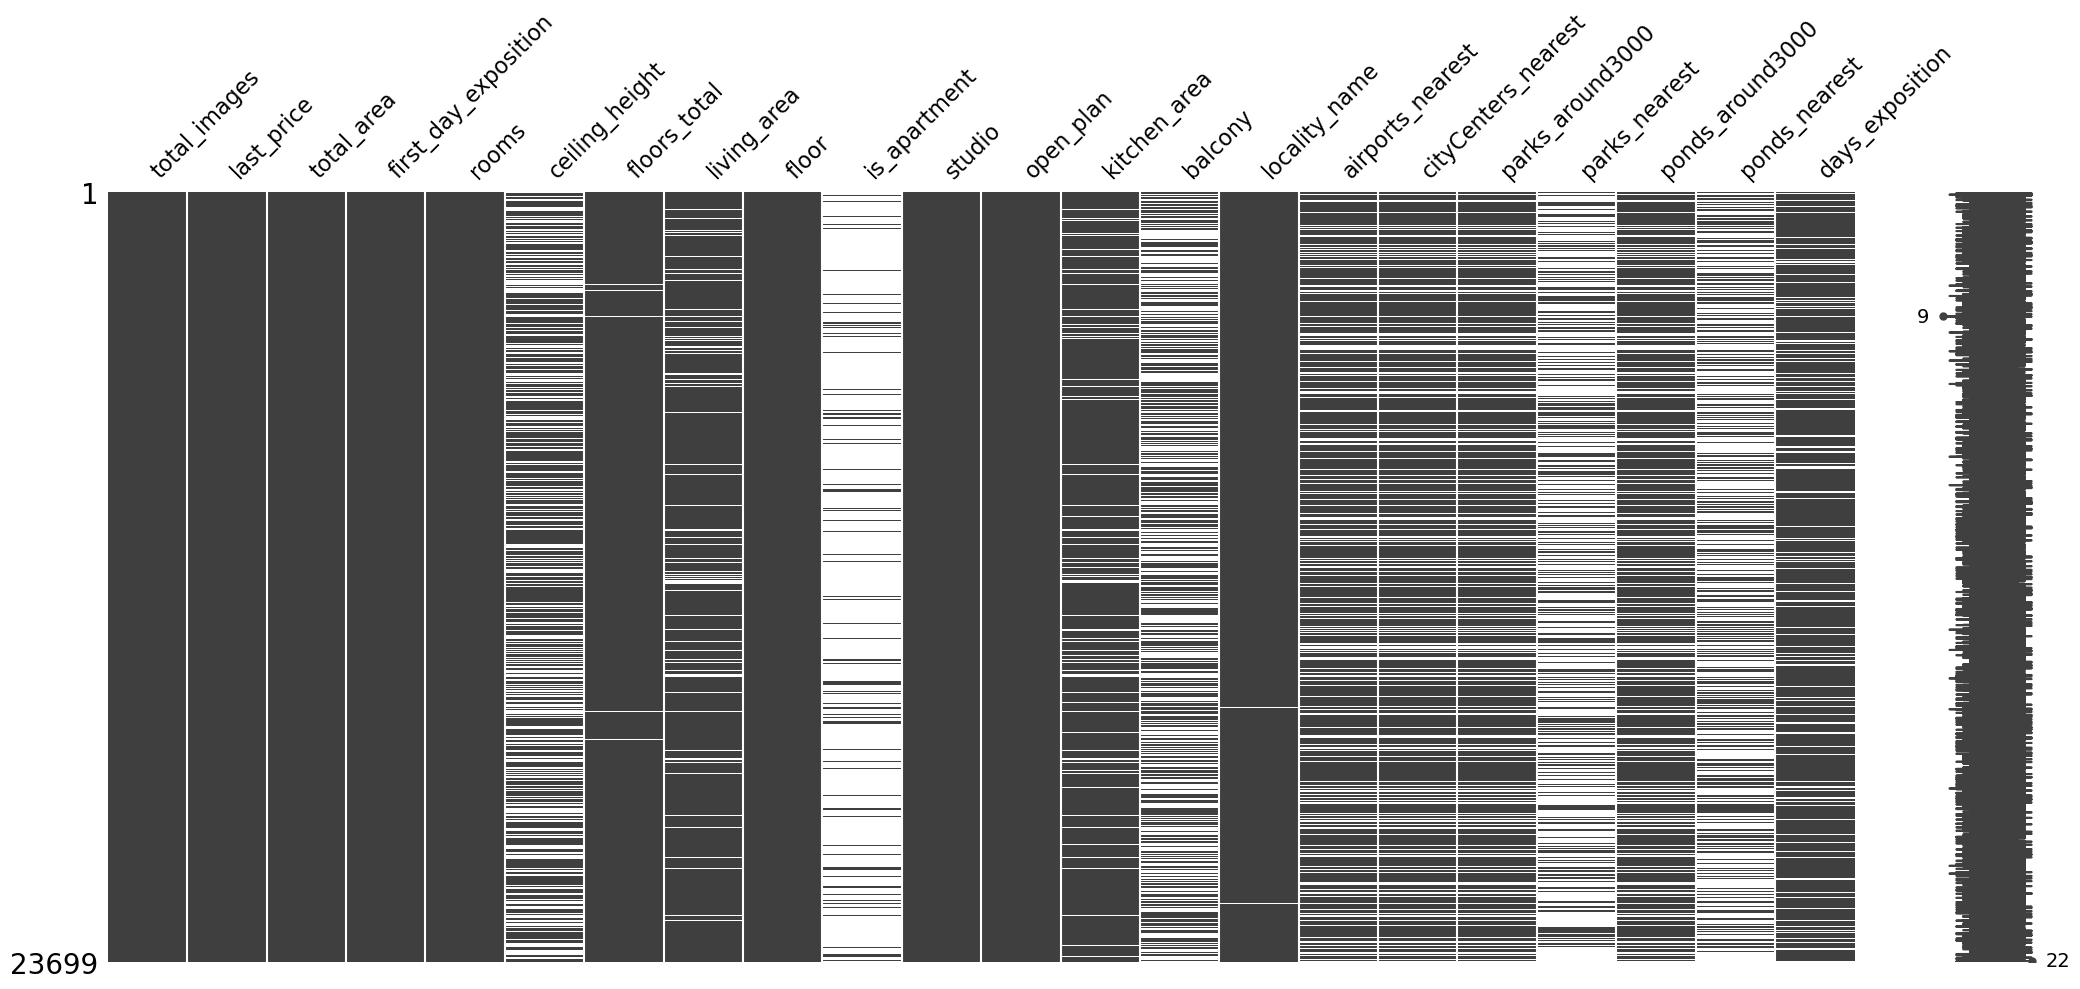

In [7]:
# Посмотрим где именно больше всего пропущенных значений и есть ли в пропусках какая-то закономерность или нет
msno.matrix(data);

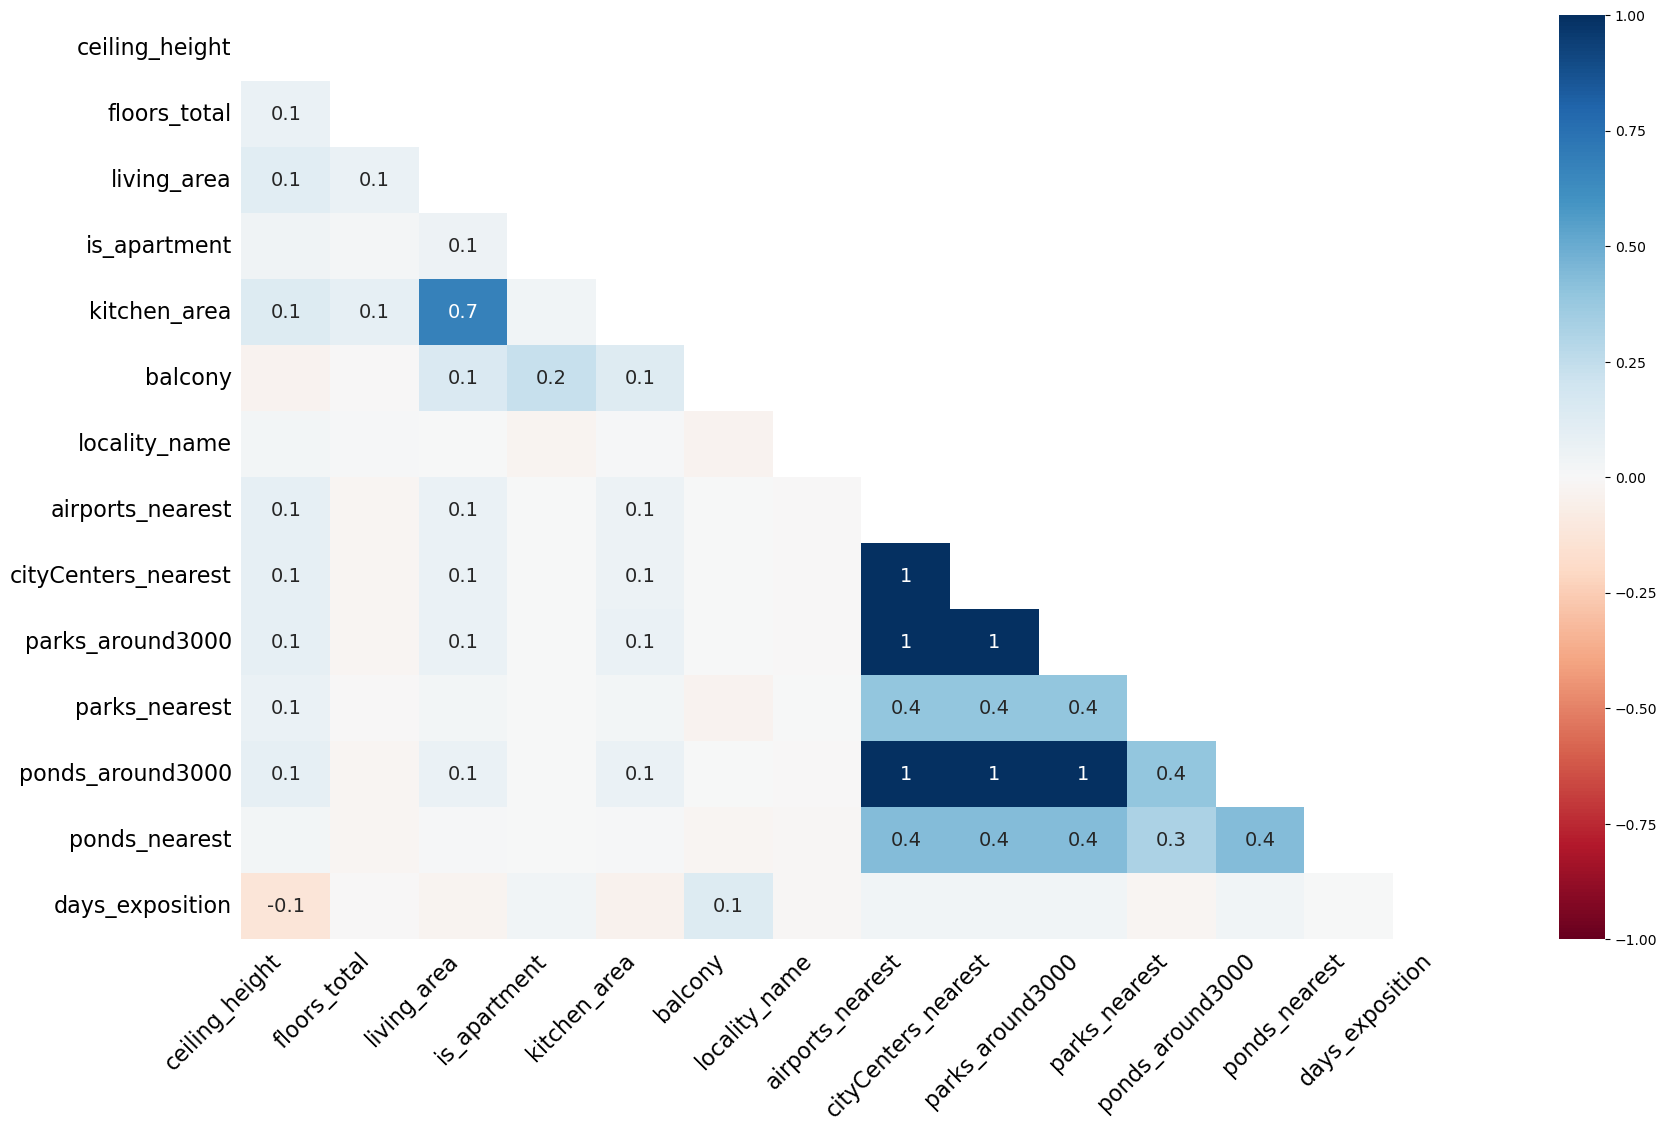

In [8]:
# Матрица корреляции пропущенных значений
msno.heatmap(data);

In [9]:
# Проверим датасет на явные дубликаты
data.duplicated().sum()

0

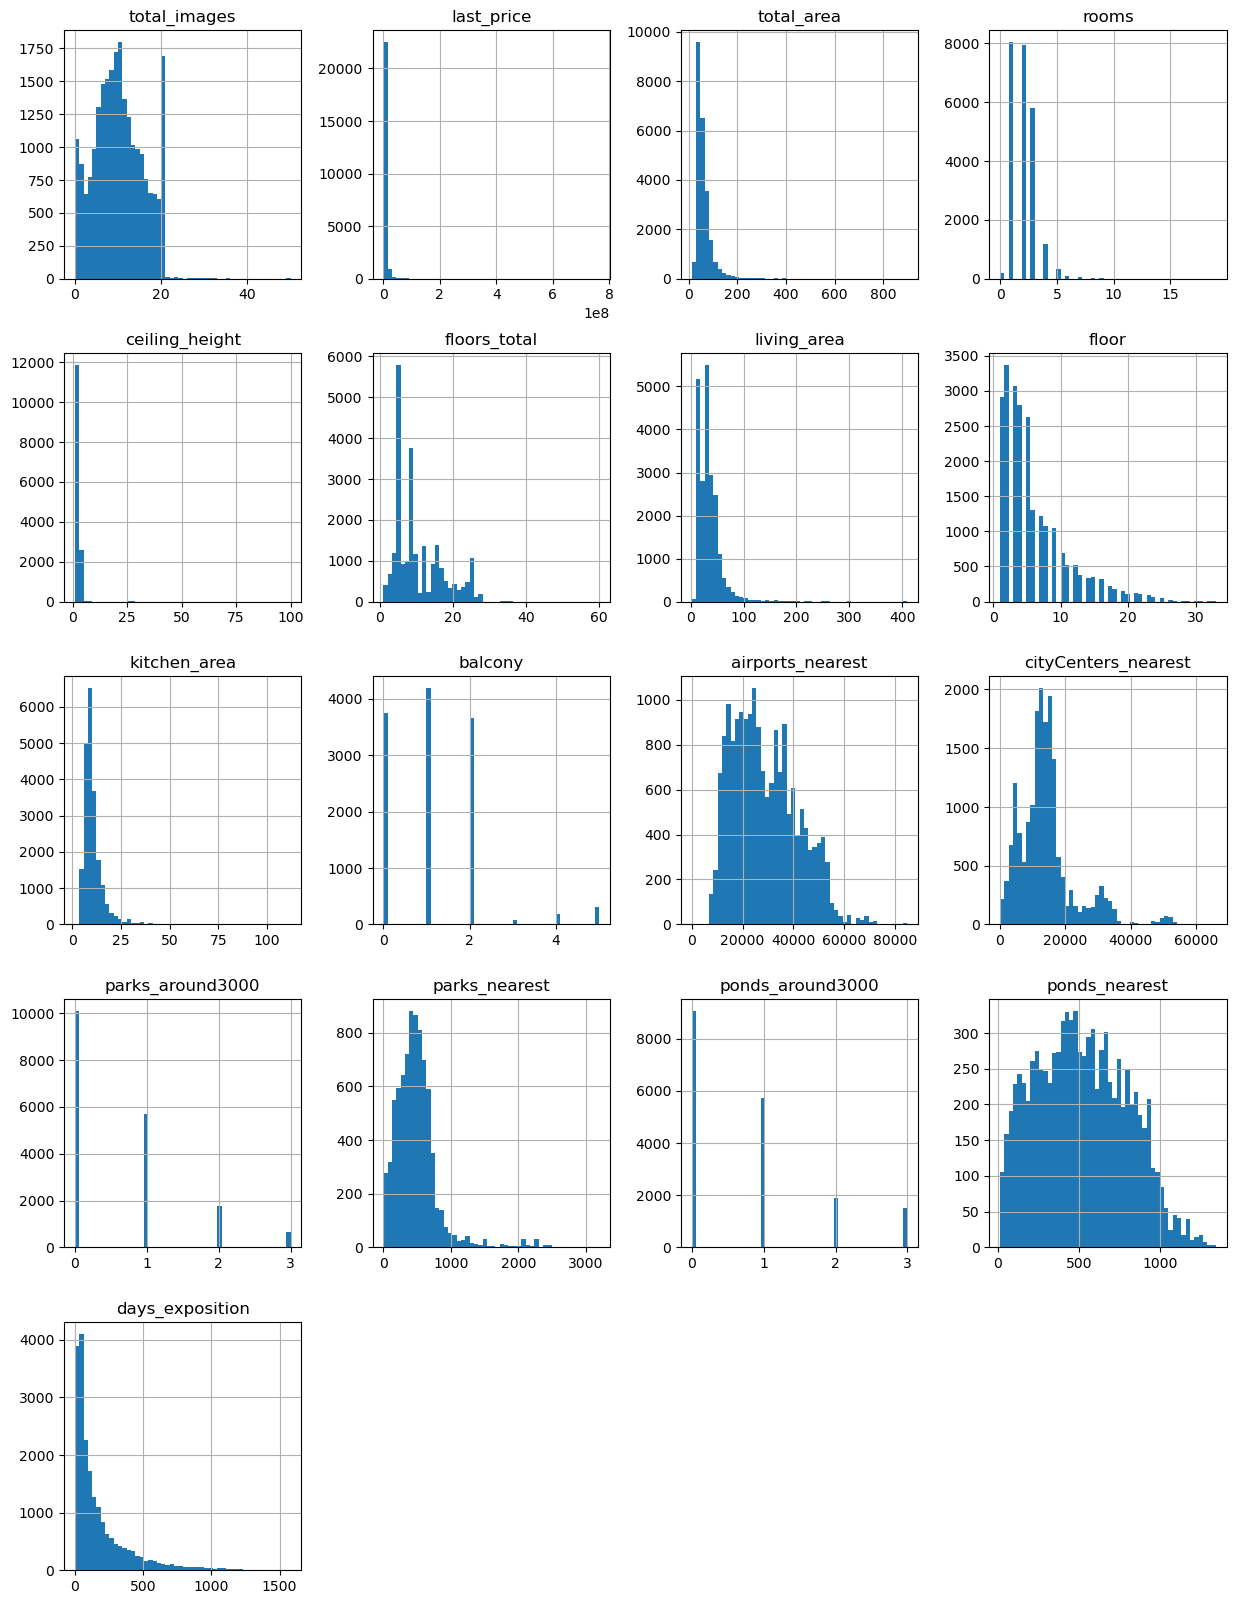

In [10]:
# Построим гистограмму для всех числовых столбцов таблицы
data.hist(bins = 50, figsize=(15, 20));

In [11]:
# Посмотрим описательные статистики
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Вывод
<a id="11"></a>

При первичном анализе данных выявлены следующие проблемы:
1. Стилистически неправильные названия столбцов, например, столбец `cityCenters_nearest`.
2. Неверные типы данных, например, `first_day_exposition` должен иметь тип `datetime`, `is_apartment` - `bool`, `balcony` - `int` и т.д.
3. Неверный формат даты.
4. Наличие пропусков в данных, в 14 столбцах есть пропущенные значения. Наибольшее количество пропусков в столбце `is_apartment` - 88.3%. 
5. **По матрице корреляций пропущенных значений можем наблюдать, что в пропусках есть закономерность для данных, собираемых автоматически на основе картографических данных, пропуски в этих столбцах связаны и скорее всего являются результатом ошибки или сбоя.**
5. Наличие аномалий в данных. Наиболее четко прослеживается в столбце `ceiling_height`, потолок высотой 100м.
6. Явных дубликатов нет.

## 3. Предобработка данных 
<a id="3"></a>

Переименуем столбцы в стиле *snake_case*.

In [12]:
# Переименуем столбец cityCenters_nearest в стиле snake_case
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'})

### 3.1. Обработка пропусков
<a id="4"></a>

в 14 столбцах есть пропущенные значения, проанализируем причины и методы обработки пропусков:

**`ceiling_height`: 9195 пропусков (38.79%).** Данные этого столбца важны для исследования. Заполнить значения нечем (так как пропусков много, заполнение медианой или иным значением исказит реальную картину), оставим пропуски.<br>
**`floors_total`: 86 пропусков (0.36%).** Возможно, пользователи не помнят сколько этажей в доме, поэтому не пишут. Пропусков мало, на исследование не повлияют. Заполнить значения нечем, оставим пропуски.<br>
**`living_area`: 1903 пропусков (8.02%).** Возможно, пользователи не помнят точную площадь, поэтому не пишут ее. Данные этого столбца важны для исследования. Однако, заполнить значения нечем, оставим пропуски.<br>
**`is_apartment`: 20924 пропусков (88.29%).** Так как продавец не указал является ли недвижимость апартаментами, то, скорее всего, она просто жилая. Такие пропуски заменим на значение False.<br>
**`kitchen_area`: 2278 пропусков (9.61%).** Пропусков мало, на исследование не повлияют. Заполнить значения нечем, оставим пропуски.<br>
**`balcony`: 11519 пропусков (48.60%).** Скорее всего, если в квартире нет балконов, то продавец не указывает их количество. Такие пропуски заменим на число 0.<br>
**`locality_name`: 49 пропусков (0.20%).** Так как пропусков в этом столбце менее 1%, они не повлияют на исследование, заменим пропуски на специальное слово 'unknown'.<br>
**`airports_nearest`: 5542 пропусков (23.38%).** Похоже на техническую ошибку автоматического сбора/выгрузки картографических данных. Пропуски в столбце на исследование не влияют, оставим их.<br>
**`city_centers_nearest`: 5519 пропусков (23.28%).** Похоже на техническую ошибку автоматического сбора/выгрузки картографических данных. Данные этого столбца важны для исследования. Заполнить значения нечем, оставим пропуски.<br>
**`parks_around_3000`: 5518 пропусков (23.28%).** Похоже на техническую ошибку автоматического сбора/выгрузки картографических данных. Пропуски в столбце на исследование не влияют, оставим их.<br>
**`parks_nearest`: 15620 пропусков (65.91%).** Похоже на техническую ошибку автоматического сбора/выгрузки картографических данных. Данные этого столбца важны для исследования. Заполнить значения нечем, оставим пропуски.<br>
**`ponds_around_3000`: 5518 пропусков (23.28%).** Похоже на техническую ошибку автоматического сбора/выгрузки картографических данных. Пропуски в столбце на исследование не влияют, оставим их.<br>
**`ponds_nearest`: 14589 пропусков (61.55%).** Похоже на техническую ошибку автоматического сбора/выгрузки картографических данных. Пропуски в столбце на исследование не влияют, оставим их.<br>
**`days_exposition`: 3181 пропусков (13.42%).** Похоже на техническую ошибку, так как эти данные обязательны и должны собираться автоматически. Данные этого столбца важны для исследования. Заполнить значения нечем, оставим пропуски.<br>

In [13]:
# Заменим пропущенные значения в столбце is_apartment на False и изменим тип данных
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')

In [14]:
# Заменим пропущенные значения в столбце balcony на 0 и изменим тип данных на целые числа
data['balcony'] = data['balcony'].fillna(0).astype('int')

In [15]:
# Заменим пропущенные значения в столбце locality_name на 'unknown' 
data['locality_name'] = data['locality_name'].fillna('unknown')

In [16]:
# Выведем количество пропущенных значений для каждого столбца
data_null = data.isna()
data_null.apply(['sum', 'mean']).transpose().style.format('{:.3f}').background_gradient(cmap='Blues', axis=0)

,sum,mean
total_images,0.000,0.000
last_price,0.000,0.000
total_area,0.000,0.000
first_day_exposition,0.000,0.000
rooms,0.000,0.000
ceiling_height,9195.000,0.388
floors_total,86.000,0.004
living_area,1903.000,0.080
floor,0.000,0.000
is_apartment,0.000,0.000


### 3.2. Изменение типов данных.
<a id="6"></a>

In [20]:
# Изменим в столбце first_day_exposition тип данных на datetime и уберем время из формата даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

In [21]:
# Изменим в столбце last_price тип данных на int
data['last_price'] = data['last_price'].astype('int32')
# data.info(memory_usage='deep')

если мы хотим сэкономить память:<br>

```python
data.info(memory_usage='deep')
# memory usage: 9.3 MB
data['floor_type'] = data['floor_type'].astype('category')
data['weekday_exposition'] = data['weekday_exposition'].astype('category')
data['month_exposition'] = data['month_exposition'].astype('category')
data['year_exposition'] = data['year_exposition'].astype('category')
data.info(memory_usage='deep')
# memory usage: 6.7 MB
```

### 3.3. Обработка дубликатов.
<a id="7"></a>
Явных дубликатов в датасете нет. Проверим наличие неявных дубликатов.

In [22]:
print('Количество уникальных названий населенных пунктов', data['locality_name'].nunique())
# Просмотр всех населенных пунктов
# sorted(data['locality_name'].unique())

Количество уникальных названий населенных пунктов 365


In [23]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'городской поселок'], 'поселок', regex=True)
) 

In [24]:
data['locality_name'] = data['locality_name'].replace({'Кудрово':'деревня Кудрово',
                                      'Любань':'поселок Любань',
                                      'Мурино':'поселок Мурино',
                                      'Никольское':'село Никольское',
                                      'поселок при железнодорожной станции Вещево':'поселок станции Вещево',
                                      'поселок при железнодорожной станции Приветнинское':'поселок станции Приветнинское'
                                     })

In [25]:
print('Количество уникальных названий населенных пунктов', data['locality_name'].nunique())
# Просмотр всех населенных пунктов
# sorted(data['locality_name'].unique())

Количество уникальных названий населенных пунктов 317


In [26]:
# Проверим датасет на явные дубликаты
data.duplicated().sum()

0

### 3.4. Обработка аномальных значений.
<a id="5"></a> 

In [27]:
# Просмотр описательных статистик
# data.describe().transpose()

Ориентируясь на описательные статистики рассматриваемые в первичном анализе данных, можно выделить аномальные значения в столбцах:<br>
**`last_price`: max = 763 000 000 руб.**. Аномально большое значение, изучив рынок недвижимости Ленинградской области, можно предположить, что это стоимость элитной недвижимости имеющей историческую ценность. Но это значение слишком сильно выбивается среди остальных примерно в 2 раза больше предыдущего по порядку, детально изучив все характеристики элитной недвижимости, предположим, что в цене допущена ошибка. Даже если цена реальна, она все равно будет являться выбросом, поэтому удалим это значение из датасета.<br>
**`total_area`: max = 900 $м^2$**. Аномально большое значение, изучив характеристики этого объекта и рынок недвижимости, значение вполне возможное, оставляем.<br>
**`rooms`: max = 19 комнат**. Значение большое, но возможное оставляем.<br>
**`rooms`: min = 0 комнат**. Странное указание, возможно это студия, возможно это помещение не жилое и в нем нет комнат(кладовки, гаражи), возможно это доля квартиры. Нельзя сделать сейчас какие-то выводы о замене этих значений, необходимо узнать у Яндекс.Недвижимость, что это значит. Оставляем.<br>
**`ceiling_height`: max = 1 м**. Похоже на ошибку при заполнении пользователем, объектов, в которых потолок указан менее 2 метров, всего 3, удалим их.<br>
**`ceiling_height`: min = 100 м**. Логично предположить, что слишком большие значения такие, как 25м и 32м, на самом деле это вещественные значения: 2.5м и 3.2м. Поэтому значения более 20м разделим на 10.<br>
**`days_exposition`: max = 1580 дней**.  Объявлении висело более 4 лет, причем долгие продажи не единичный случай, значение реальное, оставляем. 

In [28]:
# рассмотрим характеристики очень догорой недвижимости стоимостью более 200 000 000 руб.
# data[data['last_price'] > 200000000]
# рассмотрим характеристики смежной недвижимости в допущении, что в цене ошиблись на один 0
# data[(data['last_price'] > 70000000) & (data['last_price'] < 100000000)]
# Не будем гадать удалим аномальное значение
data = data[data['last_price'] != 763000000]

In [29]:
# удалим аномально низкие потолки
data = data[data['ceiling_height'] >= 2]

# При высоте потолков более 20м будем делить значение на 10
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10
# Посмотрим на значения среднего и медианы
print('Среднее:', data['ceiling_height'].mean().round(2))
print('Медиана:', data['ceiling_height'].median())

Среднее: 2.73
Медиана: 2.65


### Вывод
<a id="8"></a>
При предобработке данных выполнены следующие действия:
1. Столбцы `cityCenters_nearest`, `parks_around3000`, `ponds_around3000` переименованы на `city_centers_nearest`, `parks_around_3000`, `ponds_around_3000` в соответсвии со стилем *snake_case*.
2. В столбце `is_apartment` пропущенные значения заменены на False. В столбце `balcony` пропущенные значения заменены на 0. В столбце `locality_name` пропущенные значения заменены на unknown. Остальные пропущенные значения оставлены без изменений.
3. В столбце`first_day_exposition` изменен тип данных на datetime и убрано время из формата даты. В стобце `last_price` тип данных изменени на int.
4. Обработаны неявные дубликаты в столбце `locality_name`, названия населенных пунктов приведены к единому стилю. Явных дубликатов нет.
5. Обработаны аномальные значения в столбце `ceiling_height`: все значения высоты потолка выше 20м поделены на 10, так как скорее всего это ошибка при заполнении пользователем, также удалены значения потолков ниже 2 метров. Обработано аномальное значение в столбце `last_price`: объект с ценой 763 млн. руб. удален.

## 4. Расчет дополнительных параметров. 
<a id="10"></a>

Добавим в таблицу новые столбцы со следующими параметрами:
- цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

In [30]:
data['price'] = (data['last_price'] / data['total_area']).round(2)

In [31]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday.astype('category')
data['month_exposition'] = data['first_day_exposition'].dt.month.astype('category')
data['year_exposition'] = data['first_day_exposition'].dt.year.astype('category')

In [32]:
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round()

In [33]:
# функция для категоризации этажей
def floor_type(row):
    '''Возвращает тип этажа: первый, последний или другой.'''
    try:
        floor = row['floor']
        floors_total = row['floors_total']
        if floor == 1:
            return 'первый'
        elif floor == floors_total:
            return 'последний'
        elif floor <= floors_total:
            return 'другой'
    except:
        pass
    
data['floor_type'] = data.apply(floor_type, axis=1) 
data['floor_type'] = data['floor_type'].astype('category')

### Вывод
<a id="17"></a>
В датафрейм добавлены новые показатели:<br>
`price` — цена одного квадратного метра;<br>
`weekday_exposition` — день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);<br>
`month_exposition` — месяц публикации объявления;<br>
`year_exposition` — год публикации объявления;<br>
`floor_type` — тип этажа квартиры (значения — «первый», «последний», «другой»);<br>
`city_centers_nearest_km` — расстояние до центра города в километрах.

## 5. Исследовательский анализ данных
<a id="9"></a>

### 5.1. Изучение выбранных параметров.
<a id="12"></a>

**Список параметров:**
- общая площадь;<br>
- жилая площадь;<br>
- площадь кухни;<br>
- цена объекта;<br>
- количество комнат;<br>
- высота потолков;<br>
- тип этажа квартиры («первый», «последний», «другой»);<br>
- общее количество этажей в доме;<br>
- расстояние до центра города в метрах;<br>
- расстояние до ближайшего парка<br>

**Столбец `total_area`** (общая площадь)<br>
При первичном анализе на гистограмме хорошо видно, что в этом столбце есть очень большие значения, например, объект с общей площадью 900 $м^{2}$. При продаже недвижимости вполне возможны такие значения, но они являются редкостью, поэтому при проведении анализа откажемся от таких значений. Определим выбросы с помощью межквартильного размаха (IQR) и построим гистограмму без них.

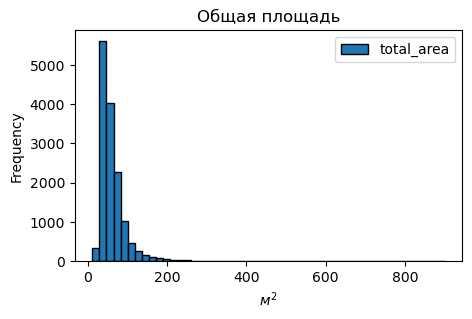

In [35]:
# Построим гистограмму для исходных данных
data.plot(y='total_area', kind='hist', bins=50, figsize=(5,3), ec='black')
plt.title('Общая площадь')
plt.xlabel('$м^{2}$');

In [36]:
# Посмотрим описательную статистику
data['total_area'].describe()

count    14501.000000
mean        61.894229
std         36.991069
min         12.000000
25%         41.000000
50%         53.400000
75%         71.330000
max        900.000000
Name: total_area, dtype: float64

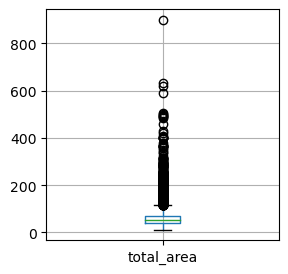

In [37]:
# Просмотр выбросов на boxplot
data.boxplot(column='total_area', figsize=(3,3));

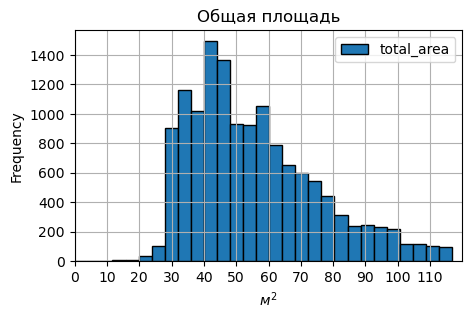

In [38]:
# Пользуясь IQR определяем нижнюю и верхнюю границу значений
def IQR_limits(columns):
    ''' Определяет нижнюю м верхнюю границу нормальных значений, используя интерквартильных размах'''
    Q1 = data[columns].quantile(0.25)
    Q3 = data[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

lower, upper = IQR_limits('total_area')

# Построим гистограмму без выбросов
data.plot(y='total_area', kind='hist', bins=30, range=(lower,upper), figsize=(5,3), ec='black', grid=True)
plt.title('Общая площадь')
plt.xlabel('$м^{2}$')
plt.xlim(0, 120)
plt.xticks(np.arange(0, 120, 10));

**Вывод**<br>
Большая часть объектов недвижимости имеют площадь от 30 до 65 м². Самый распространенный вариант - около 45 м². Площадь объектов меньше 30 м² встречается редко. С площадью более 100 м² также редкость, но при этом среднее значение - 60 м² и медиана 52 м² сдвинуты в сторону больших значений, график получается растянутым и имеет динных хвост в сторону больших значений.

**Столбец `living_area`** (жилая площадь)<br>
При первичном анализе на гистограмме хорошо видно, что в этом столбце есть очень большие значения, например, объект с жилой площадью 400 $м^{2}$. При продаже недвижимости вполне возможны такие значения, но они являются редкостью, поэтому при проведении анализа откажемся от таких значений. Определим выбросы с помощью межквартильного размаха (IQR) и построим гистограмму без них.

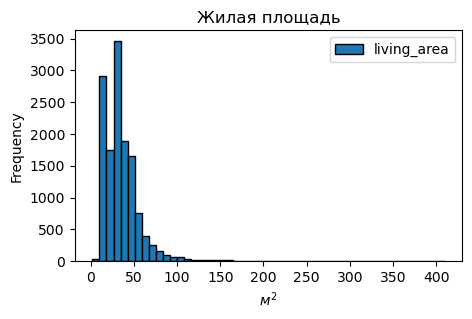

In [39]:
# Построим гистограмму для исходных данных
data.plot(y='living_area', kind='hist', bins=50, figsize=(5,3), ec='black')
plt.title('Жилая площадь')
plt.xlabel('$м^{2}$');

In [40]:
# Посмотрим описательную статистику
data['living_area'].describe()

count    13704.000000
mean        35.681810
std         22.854442
min          2.000000
25%         19.200000
50%         30.800000
75%         43.300000
max        409.700000
Name: living_area, dtype: float64

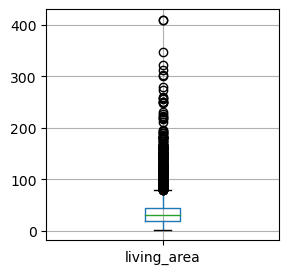

In [41]:
# Просмотр выбросов на boxplot
data.boxplot(column='living_area', figsize=(3,3));

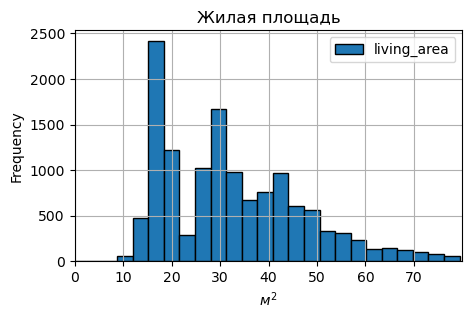

In [42]:
# Пользуясь IQR определяем нижнюю и верхнюю границу значений
lower, upper = IQR_limits('living_area')
# Построим гистограмму без выбросов
data.plot(y='living_area', kind='hist', bins=30, range=(lower,upper), figsize=(5,3), ec='black', grid=True)
plt.title('Жилая площадь')
plt.xlabel('$м^{2}$')
plt.xlim(0, 80)
plt.xticks(np.arange(0, 80, 10));

**Вывод**<br>
Большая часть объектов недвижимости имеют жилую площадь от 15 до 20 м². Самый распространенный вариант - около 15 м². Жилая площадь объектов менее 30 м² встречается редко. С площадью больше 45 м² также редкость, но при этом среднее значение - 34 м² и медиана 30 м² сдвинуты в сторону больших значений, график получается растянутым и имеет динных хвост в сторону больших значений.

**Столбец `kitchen_area`** (площадь кухни)<br>
При первичном анализе на гистограмме хорошо видно, что в этом столбце есть очень большие значения, например, объект с площадью кухни 112 $м^{2}$. При продаже недвижимости вполне возможны такие значения, но они являются редкостью, поэтому при проведении анализа откажемся от таких значений. Определим выбросы с помощью межквартильного размаха (IQR) и построим гистограмму без них.

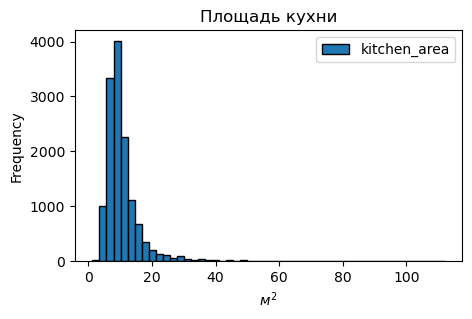

In [43]:
# Построим гистограмму для исходных данных
data.plot(y='kitchen_area', kind='hist', bins=50, figsize=(5,3), ec='black')
plt.title('Площадь кухни')
plt.xlabel('$м^{2}$');

In [44]:
# Посмотрим описательную статистику
data['kitchen_area'].describe()

count    13561.000000
mean        10.569007
std          6.053483
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

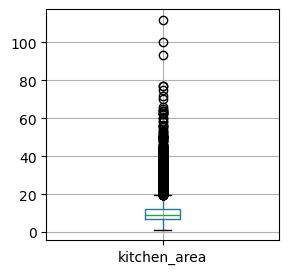

In [45]:
# Просмотр выбросов на boxplot
data.boxplot(column='kitchen_area', figsize=(3,3));

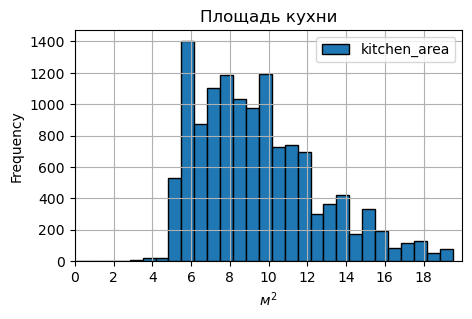

In [46]:
# Пользуясь IQR определяем нижнюю и верхнюю границу значений
lower, upper = IQR_limits('kitchen_area')
# Построим гистограмму без выбросов
data.plot(y='kitchen_area', kind='hist', bins=30, range=(lower,upper), figsize=(5,3), ec='black', grid=True)
plt.title('Площадь кухни')
plt.xlabel('$м^{2}$')
plt.xlim(0, 20)
plt.xticks(np.arange(0, 20, 2));

**Вывод**<br>
Большая часть объектов недвижимости имеют площадь кухни от 5 до 12 м². Самый распространенный вариант - около 6 м². Площадь кухни объектов менее 5 м² встречается редко. С площадью больше 12 м² также редкость, но при этом среднее значение - 10 м² и медиана 9 м² сдвинуты в сторону больших значений, график получается растянутым и имеет динных хвост в сторону больших значений.

**Столбец `last_price`** (цена объекта)<br>
При первичном анализе на гистограмме хорошо видно, что в этом столбце есть очень большие значения, например, объект со стоимостью 420 млн. руб. При продаже недвижимости вполне возможны такие значения (например, это историческое здание), но они являются редкостью, поэтому при проведении анализа откажемся от таких значений. Определим выбросы с помощью межквартильного размаха (IQR) и построим гистограмму без них.

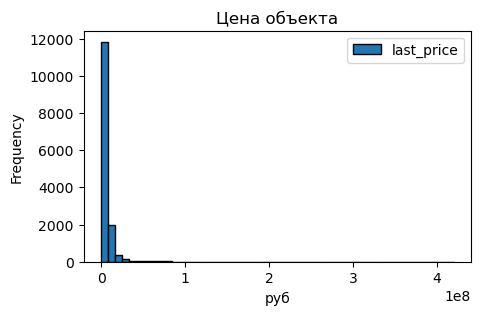

In [47]:
# Построим гистограмму для исходных данных
data.plot(y='last_price', kind='hist', bins=50, figsize=(5,3), ec='black')
plt.title('Цена объекта')
plt.xlabel('руб');

In [48]:
# Посмотрим описательную статистику
data['last_price'].describe()

count    1.450100e+04
mean     6.836312e+06
std      1.018289e+07
min      1.219000e+04
25%      3.570000e+06
50%      4.850000e+06
75%      7.000000e+06
max      4.200000e+08
Name: last_price, dtype: float64

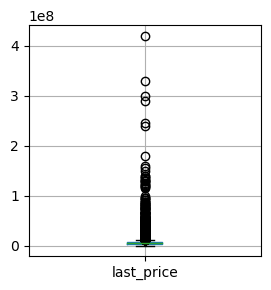

In [49]:
# Просмотр выбросов на boxplot
data.boxplot(column='last_price', figsize=(3,3));

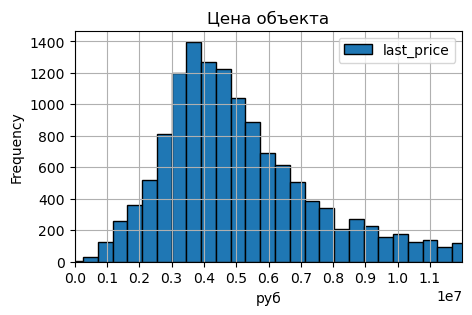

In [50]:
# Пользуясь IQR определяем нижнюю и верхнюю границу значений
lower, upper = IQR_limits('last_price')
# Построим гистограмму без выбросов
data.plot(y='last_price', kind='hist', bins=30, range=(lower,upper), figsize=(5,3), ec='black', grid=True)
plt.title('Цена объекта')
plt.xlabel('руб')
plt.xlim(0, 12000000)
plt.xticks(np.arange(0, 12000000, 1000000));

**Вывод**<br>
Большая часть объектов недвижимости имеют стоимость от 2.5 до 6 млн. руб. Самый распространенный вариант - около 3.5 м². Цена объектов менее 2 млн. руб. встречается наиболее редко. С ценой больше 6 м² также редкость, но при этом среднее значение - 6.5 м² и медиана 4.6 м² сдвинуты в сторону больших значений, график получается растянутым и имеет динных хвост в сторону больших значений.

**Столбец `rooms`** (количество комнат)<br>
При первичном анализе на гистограмме хорошо видно, что в этом столбце есть очень большие значения, например, объект с 16 комнатанами или 0 комнат (может это студия?). При продаже недвижимости вполне возможны такие значения, но они являются редкостью, поэтому при проведении анализа откажемся от таких значений. Определим выбросы с помощью межквартильного размаха (IQR) и построим гистограмму без них, также уберем неккоректные значения 0 комнат.

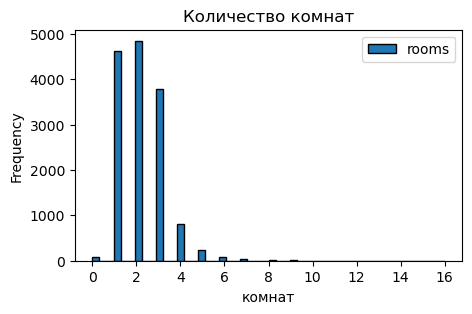

In [51]:
# Построим гистограмму для исходных данных
data.plot(y='rooms', kind='hist', bins=50, figsize=(5,3), ec='black')
plt.title('Количество комнат')
plt.xlabel('комнат');

In [52]:
# Посмотрим описательную статистику
data['rooms'].describe()

count    14501.000000
mean         2.137439
std          1.099062
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

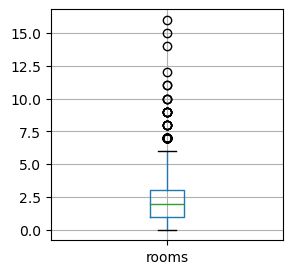

In [53]:
# Просмотр выбросов на boxplot
data.boxplot(column='rooms', figsize=(3,3));

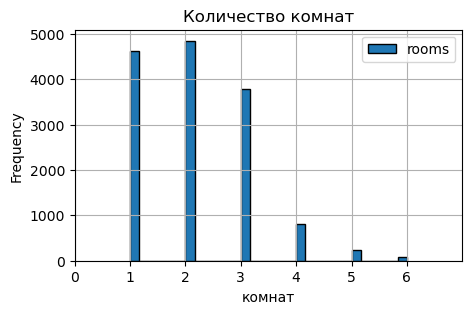

In [54]:
# Пользуясь IQR определяем нижнюю и верхнюю границу значений
lower, upper = IQR_limits('rooms')
# Построим гистограмму без выбросов
data.plot(y='rooms', kind='hist', bins=30, range=(1,upper), figsize=(5,3), ec='black', grid=True)
plt.title('Количество комнат')
plt.xlabel('комнат')
plt.xlim(0, 7)
plt.xticks(np.arange(0, 7, 1));

**Вывод**<br>
Большая часть объектов недвижимости имеют 1-2 комнаты. Самый распространенный вариант - 1 комната. Объекты с более 3 комнат встречаются редко. Среднее значение и медиана - 2 комнаты сдвинуты в сторону больших значений, график получается растянутым и имеет хвост в сторону больших значений.<br>
Большинство людей предпочитают покупать однокомнатные или двухкомнатные квартиры, так как их стоимость существенно меньше, а необходимости в большой жилплощади у большинства нет. Многокомнатные квартиры подходят большим семьям, а таких существенно меньше.

**Столбец `ceiling_height`** (высота потолков)<br>
При первичном анализе на гистограмме хорошо видно, что в этом столбце есть очень большие значения, например, высота потолков 14м. При продаже недвижимости вполне возможны такие значения (например, пентхаусы), но они являются редкостью, поэтому при проведении анализа откажемся от таких значений. Определим выбросы с помощью межквартильного размаха (IQR) и построим гистограмму без них.

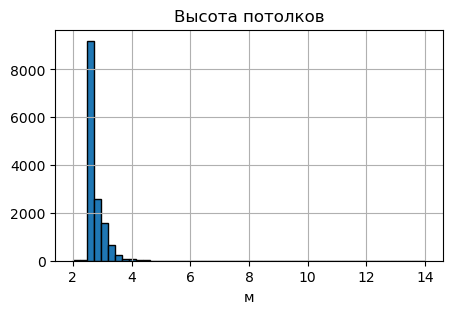

In [55]:
# Построим гистограмму для исходных данных
data['ceiling_height'].hist(bins=50, ec='black', figsize=(5,3))
plt.title('Высота потолков')
plt.xlabel('м');

In [56]:
# Посмотрим описательную статистику
data['ceiling_height'].describe()

count    14501.000000
mean         2.729900
std          0.319204
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

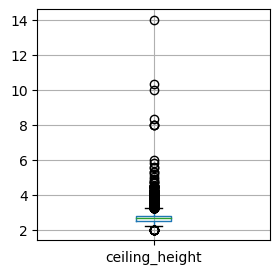

In [57]:
# Просмотр выбросов на boxplot
data.boxplot(column='ceiling_height', figsize=(3,3));

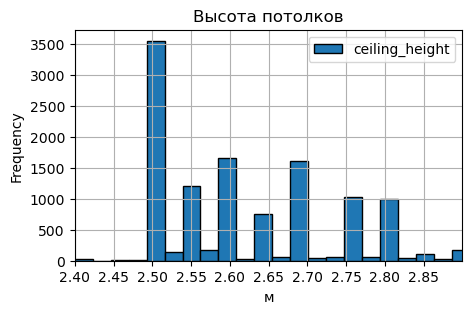

In [58]:
# Пользуясь IQR определяем нижнюю и верхнюю границу значений
lower, upper = IQR_limits('ceiling_height')
# Построим гистограмму без выбросов
data.plot(y='ceiling_height', kind='hist', bins=50, range=(lower,upper), figsize=(5,3), ec='black', grid=True)
plt.title('Высота потолков')
plt.xlabel('м')
plt.xlim(2.4, 2.9)
plt.xticks(np.arange(2.4, 2.9, 0.05));

**Вывод**<br>
Большая часть объектов недвижимости имеют высоту потолков 2.5м, которая является стандартной высотой для новостроек. Объекты с высотой потолков 2.6-2.7м, тоже встречаются достаточно часто, скорее всего это дома старого жилищного фонда. Среднее значение - 2.7м и медиана - 2.65м. <br>

**Столбец `floor_type`** (тип этажа квартиры)<br>
При первичном анализе на гистограмме хорошо видно, что в этом столбце есть очень большие значения, например, объект с 19 комнатанами или 0 комнат (может это студия?). При продаже недвижимости вполне возможны такие значения, но они являются редкостью, поэтому при проведении анализа откажемся от таких значений. Определим выбросы с помощью межквартильного размаха (IQR) и построим гистограмму без них, также уберем неккоректные значения 0 комнат.

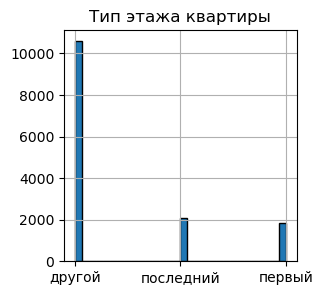

In [59]:
# Построим гистограмму для исходных данных
data['floor_type'].hist(bins=30, figsize=(3,3), ec='black')
plt.title('Тип этажа квартиры');

**Вывод**<br>
Большая часть объектов недвижимости находится между первым и последним этажом, что логично. Доли недвижимости на первом и последнем этаже практически одинаковы, и существенно меньше, чем на других этажах.

**Столбец `floors_total`** (общее количество этажей в доме)<br>
При первичном анализе на гистограмме хорошо видно, что в этом столбце есть очень большие значения, например, объект с 60 этажами в доме. При продаже недвижимости вполне возможны такие значения (например, квартира в небоскребе), но они являются редкостью, поэтому при проведении анализа откажемся от таких значений. Определим выбросы с помощью межквартильного размаха (IQR) и построим гистограмму без них.

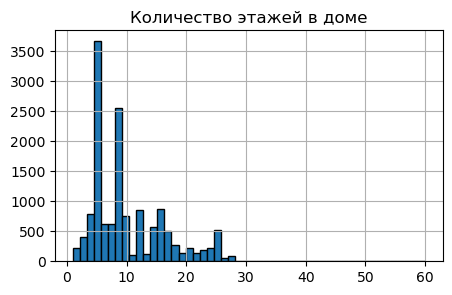

In [60]:
# Построим гистограмму для исходных данных
data['floors_total'].hist(bins=50, ec='black', figsize=(5,3))
plt.title('Количество этажей в доме');

In [61]:
# Посмотрим описательную статистику
data['floors_total'].describe()

count    14492.000000
mean        10.171612
std          6.198320
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         60.000000
Name: floors_total, dtype: float64

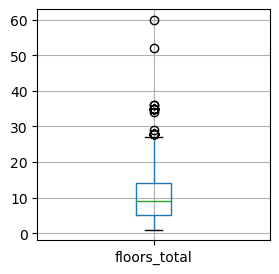

In [62]:
# Просмотр выбросов на boxplot
data.boxplot(column='floors_total', figsize=(3,3));

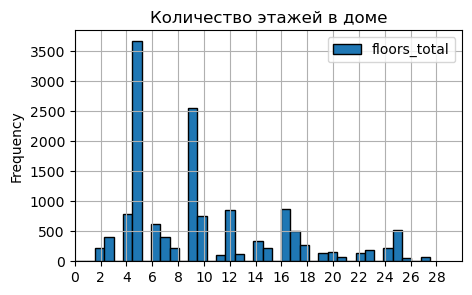

In [63]:
# Пользуясь IQR определяем нижнюю и верхнюю границу значений
lower, upper = IQR_limits('floors_total')
# Построим гистограмму без выбросов
data.plot(y='floors_total', kind='hist', bins=50, range=(lower,upper), figsize=(5,3), ec='black', grid=True)
plt.title('Количество этажей в доме')
plt.xlim(0, 30)
plt.xticks(np.arange(0, 30, 2));

**Вывод**<br>
   Большая часть объектов недвижимости - это 5-ти , 9-ти этажки. Остальные варианты представлены реже. Среднее 10 этажей и медиана 9 этажей.<br>

**Столбец `city_centers_nearest`** (расстояние до центра города в метрах)<br>
При первичном анализе на гистограмме хорошо видно, что в этом столбце есть очень большие значения, например, объект удаленный от центра города на 65км. При продаже недвижимости вполне возможны такие значения, но они являются редкостью, поэтому при проведении анализа откажемся от таких значений. Определим выбросы с помощью межквартильного размаха (IQR) и построим гистограмму без них.

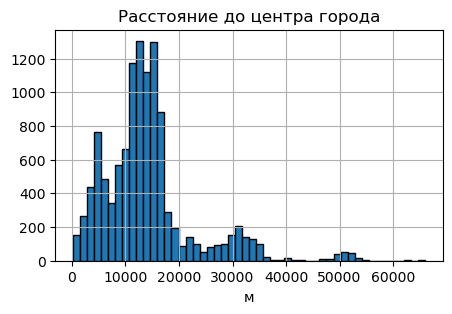

In [64]:
# Построим гистограмму для исходных данных
data['city_centers_nearest'].hist(bins=50, ec='black', figsize=(5,3))
plt.title('Расстояние до центра города')
plt.xlabel('м');

In [65]:
# Посмотрим описательную статистику
data['city_centers_nearest'].describe()

count    11558.000000
mean     14064.941945
std       8758.924523
min        181.000000
25%       9038.750000
50%      12949.000000
75%      16032.750000
max      65968.000000
Name: city_centers_nearest, dtype: float64

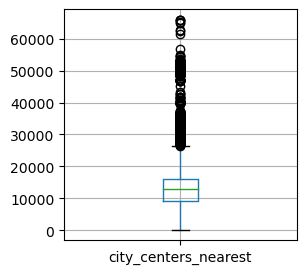

In [66]:
# Просмотр выбросов на boxplot
data.boxplot(column='city_centers_nearest', figsize=(3,3));

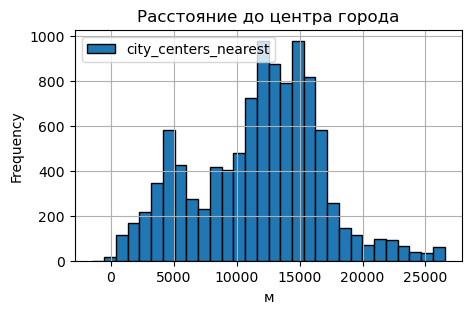

In [67]:
# Пользуясь IQR определяем нижнюю и верхнюю границу значений
lower, upper = IQR_limits('city_centers_nearest')
# Построим гистограмму без выбросов
data.plot(y='city_centers_nearest', kind='hist', bins=30, range=(lower,upper), figsize=(5,3), ec='black', grid=True)
plt.title('Расстояние до центра города')
plt.xlabel('м');

**Вывод**<br>
Большая часть объектов недвижимости находится в 10-17км. Самый распространенный вариант - около 13км. Объекты удаленные от центра менее 10км встречаются относительно часто. Удаление более чем на 17км встречается реже. Среднее значение - 14км и медиана 13км. Много человек живет в спальных районах, которые находятся на некотором удалении от центра города, в самом центре города людей живет меньше, еще меньше людей живет загородом.

**Столбец `parks_nearest`** (расстояние до ближайшего парка)<br>
При первичном анализе на гистограмме хорошо видно, что в этом столбце есть очень большие значения, например, объект удаленный от ближайшего парка на 65км. При продаже недвижимости вполне возможны такие значения, но они являются редкостью, поэтому при проведении анализа откажемся от таких значений. Определим выбросы с помощью межквартильного размаха (IQR) и построим гистограмму без них.

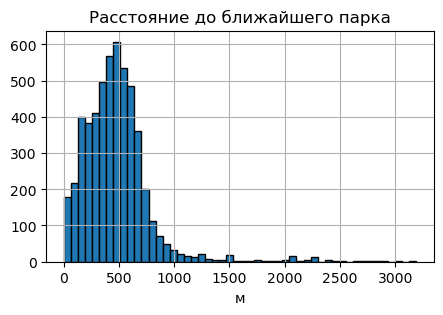

In [68]:
# Построим гистограмму для исходных данных
data['parks_nearest'].hist(bins=50, ec='black', figsize=(5,3))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('м');

In [69]:
# Посмотрим описательную статистику
data['parks_nearest'].describe()

count    5293.000000
mean      476.794823
std       319.950489
min         3.000000
25%       285.000000
50%       449.000000
75%       602.000000
max      3190.000000
Name: parks_nearest, dtype: float64

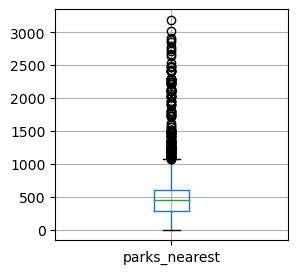

In [70]:
# Просмотр выбросов на boxplot
data.boxplot(column='parks_nearest', figsize=(3,3));

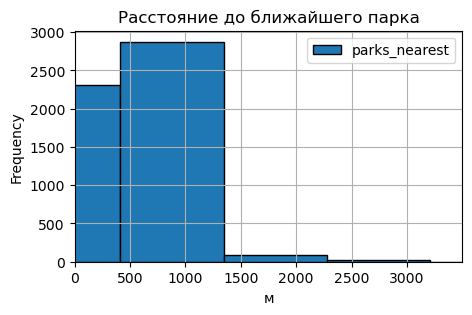

In [71]:
# Пользуясь IQR определяем нижнюю и верхнюю границу значений
lower, upper = IQR_limits('city_centers_nearest')
# Построим гистограмму без выбросов
data.plot(y='parks_nearest', kind='hist', bins=30, range=(lower,upper), figsize=(5,3), ec='black', grid=True)
plt.title('Расстояние до ближайшего парка')
plt.xlabel('м')
plt.xlim(0, 3500)
plt.xticks(np.arange(0, 3500, 500));

**Вывод**<br>
Большая часть объектов недвижимости находится в 500м от ближайшего парка. Самый распространенный вариант - около 13км. Объекты удаленные от парка менее 1.5км встречаются относительно часто. Удаление более чем на 1.5км редкость. Среднее значение - 490м и медиана 455км. Скорее всего, это связано с лучшей экологией около парковых зон.

### 5.2. Изучим как быстро продавались квартиры.
<a id="13"></a>

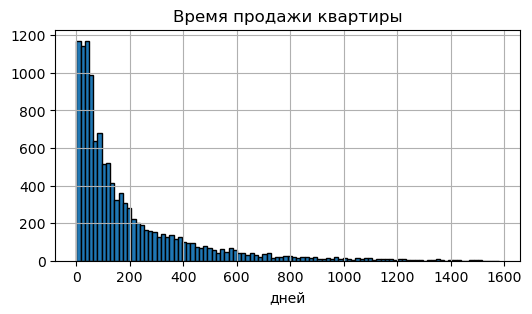

In [72]:
# Построим гистограмму по исходным данным
data['days_exposition'].hist(bins=100, figsize=(6,3), ec='black')
plt.title('Время продажи квартиры')
plt.xlabel('дней');

In [73]:
# Посмотрим описательную статистику
data['days_exposition'].describe()

count    12048.000000
mean       190.447294
std        228.715409
min          1.000000
25%         45.000000
50%        103.000000
75%        248.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время продажи 181 день, медианное - 95 дней. На графике длиный хвост в сторону больших значений, это хначит в данных много больших значений. Среднее значение в 2 раза больше медианного. Из этого следует, что в данных много выбросов.

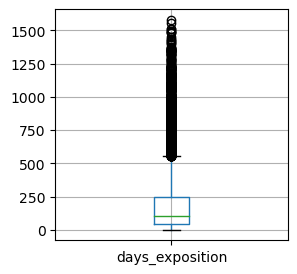

In [74]:
# Просмотр выбросов на boxplot
data.boxplot(column='days_exposition', figsize=(3,3));

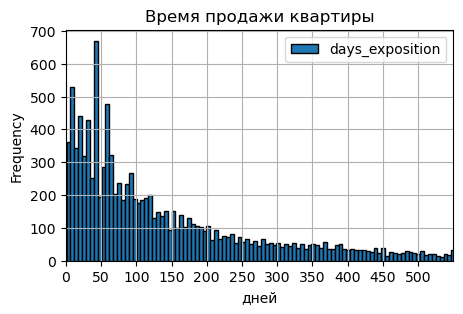

In [75]:
# Пользуясь IQR определяем нижнюю и верхнюю границу значений
lower, upper = IQR_limits('days_exposition')
# Построим гистограмму без выбросов
data.plot(y='days_exposition', kind='hist', bins=100, range=(1,upper), figsize=(5,3), ec='black', grid=True)
plt.title('Время продажи квартиры')
plt.xlabel('дней')
plt.xlim(0, 550)
plt.xticks(np.arange(0, 550, 50));

In [76]:
data['days_exposition'].value_counts()

days_exposition
45.0     396
60.0     274
7.0      155
30.0     150
90.0     104
        ... 
996.0      1
682.0      1
513.0      1
741.0      1
971.0      1
Name: count, Length: 1037, dtype: int64

**Вывод**<br>


На графике boxplot видно, что нормальные сроки находятся в диапазоне 45 - 232 дней, выбросами считаем объявления, которые держатся более 500 дней. Можно считать, что объявления снятые в первые 45 дней - являются быстрыми, а те, что держатся больше 500 дней - необычно долгими. 

На гистограмме наблюдаются скачки: 7, 30, 45, 60, 90 дней. Большая часть объявлений была размещена 45 дней. Объявления, которые остаются более 90 дней редкость. Обратившись к <a href='https://yandex.ru/support/realty/agency/home/add-ads-housing.html'>Яндекс справке</a> становится понятно, что это стандартные сроки публикации объявления для разных типов недвижимости.

### 5.3. Влияние факторов на стоимость объекта.
<a id="14"></a>
Изучим какие факторы больше всего влияют на общую стоимость объекта, т.е. зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

**Зависимость цена - общая площадь.**

коэффициент корреляции Пирсона: 0.6488749209229593


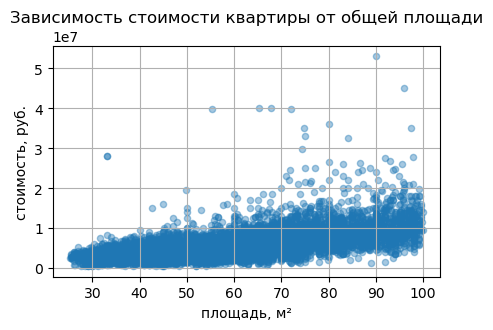

In [77]:
# Так как коэффициент корреляции Пирсона чувствителен к выбросам, уберем их из данных
temp_data = data[(data['total_area'] > 25) & (data['total_area'] < 100) & (data['last_price'] < 120000000)]

temp_data.plot(kind='scatter', x='total_area', y='last_price', alpha=0.4, figsize=(5,3), grid=True)
plt.title('Зависимость стоимости квартиры от общей площади')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, руб.');
print('коэффициент корреляции Пирсона:', temp_data['last_price'].corr(temp_data['total_area']))

**Зависимость цена - жилая площадь.**

коэффициент корреляции Пирсона: 0.4122911413848283


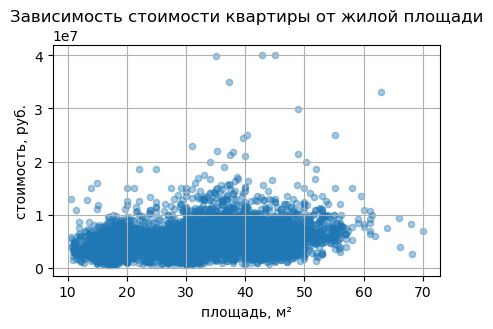

In [78]:
# Так как коэффициент корреляции Пирсона чувствителен к выбросам, уберем их из данных
temp_data = data[(data['living_area'] > 10) & (data['total_area'] < 80) & (data['last_price'] < 120000000)]

temp_data.plot(kind='scatter', x='living_area', y='last_price', alpha=0.4, figsize=(5,3), grid=True)
plt.title('Зависимость стоимости квартиры от жилой площади')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, руб.');
print('коэффициент корреляции Пирсона:', temp_data['last_price'].corr(temp_data['living_area']))

**Зависимость цена - площадь кухни.**

коэффициент корреляции Пирсона: 0.4801853152947262


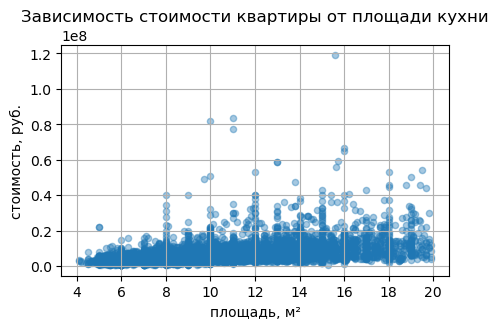

In [79]:
# Так как коэффициент корреляции Пирсона чувствителен к выбросам, уберем их из данных
temp_data = data[(data['kitchen_area'] > 4) & (data['kitchen_area'] < 20) & (data['last_price'] < 120000000)]

temp_data.plot(kind='scatter', x='kitchen_area', y='last_price', alpha=0.4, figsize=(5,3), grid=True)
plt.title('Зависимость стоимости квартиры от площади кухни')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, руб.');
print('коэффициент корреляции Пирсона:', temp_data['last_price'].corr(temp_data['kitchen_area']))

**Вывод** <br>
Мы рассмотрели зависимость полной стоимости недвижимости от общей площади, жилой площади и площади кухни. Во всех случаях имеет место слабая положительная связь, чем больше площадь квартиры, тем больше ее стоимость. Больше всего на стоимость объекта влияет общая площадь квартиры.

**Зависимость цена - количество комнат.**

коэффициент корреляции Пирсона: 0.4310061878168967


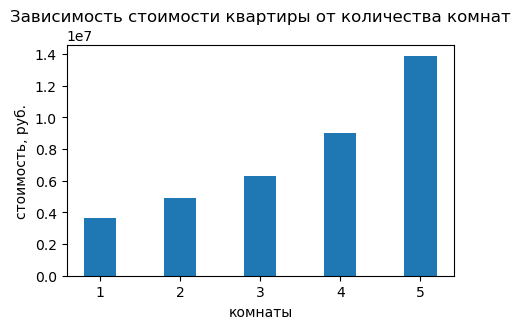

In [80]:
# Так как коэффициент корреляции Пирсона чувствителен к выбросам, уберем их из данных
temp_data = data[(data['rooms'] > 0) & (data['rooms'] <= 5) & (data['last_price'] < 120000000)]

pivot_table_rooms = temp_data.pivot_table(index='rooms', values='last_price', aggfunc='median')

plt.figure(figsize=(5,3))
plt.bar(pivot_table_rooms.index, pivot_table_rooms['last_price'], width = 0.4) 
plt.title('Зависимость стоимости квартиры от количества комнат')
plt.xlabel('комнаты')
plt.ylabel('стоимость, руб.');
print('коэффициент корреляции Пирсона:', temp_data['last_price'].corr(temp_data['rooms']))

**Вывод** <br>
Имеет место слабая положительная связь, чем больше комнат в квартире, тем больше ее стоимость.

**Зависимость цена - тип этажа.**

In [81]:
temp_data = data[(data['last_price'] < 120000000)]
pivot_table_floor_type = temp_data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
pivot_table_floor_type

,last_price
floor_type,
другой,5000000
первый,4050000
последний,4500000


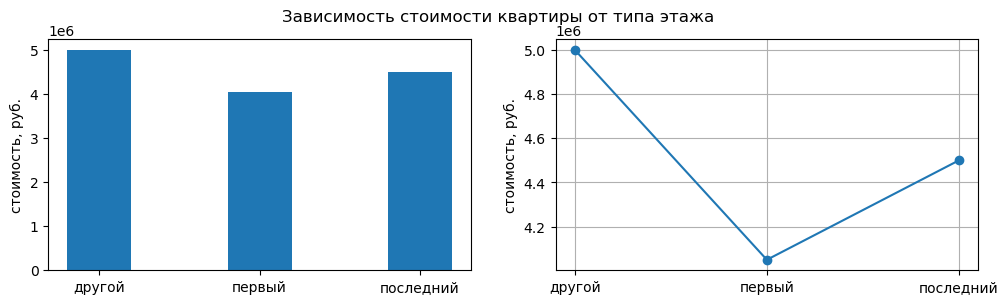

In [82]:
plt.figure(figsize=(12,3))
plt.suptitle('Зависимость стоимости квартиры от типа этажа')
plt.subplot(1, 2, 1)
plt.bar(pivot_table_floor_type.index, pivot_table_floor_type['last_price'], width = 0.4)
plt.ylabel('стоимость, руб.')
plt.subplot(1, 2, 2)
plt.plot(pivot_table_floor_type['last_price'], marker='o')
plt.grid(True)
plt.ylabel('стоимость, руб.');

**Вывод**<br>
Из диаграммы видно, что медианное значение стоимости наименьшее для первого этажа, стоимость квартир находящихся на других этажах выше.

**Зависимость цена - дата размещения (день недели, месяц, год).**

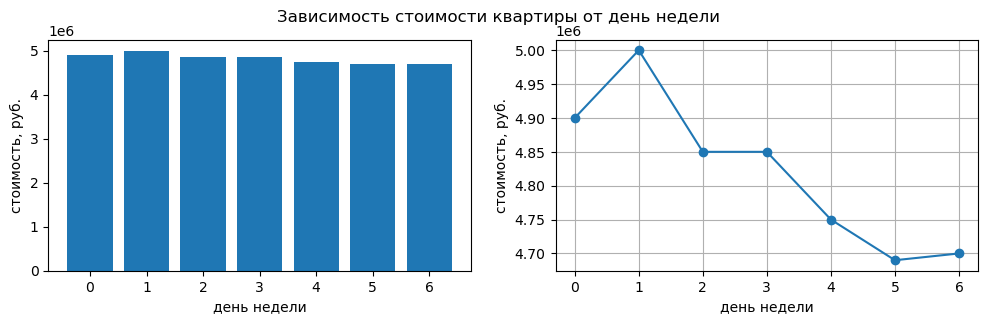

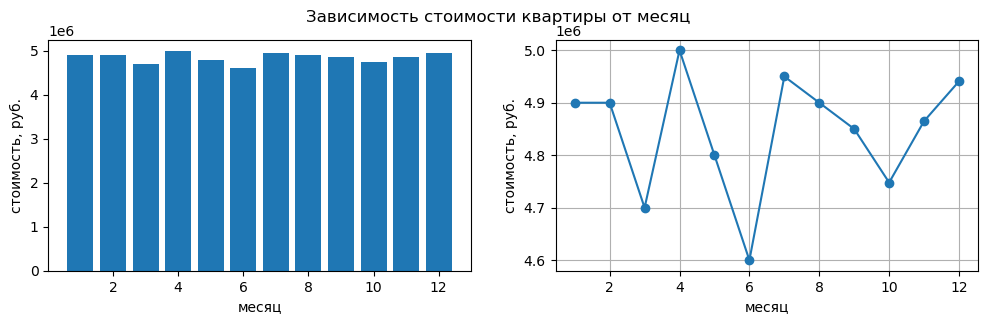

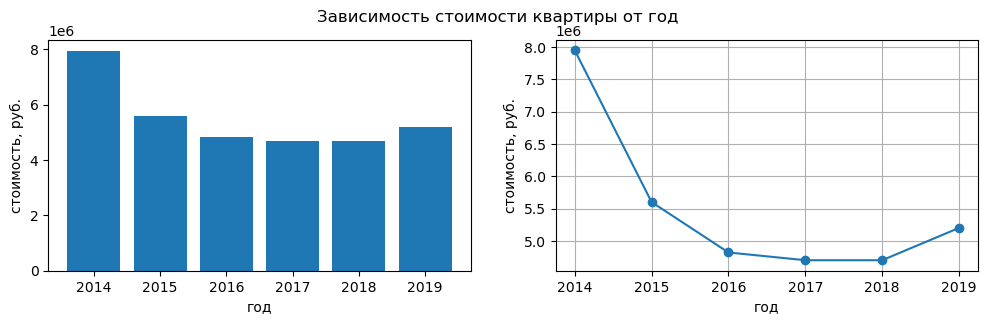

In [83]:
# Так как коэффициент корреляции Пирсона чувствителен к выбросам, уберем их из данных
temp_data = data[(data['last_price'] < 120000000)]

date_list = ['weekday_exposition', 'month_exposition', 'year_exposition']
title_list = ['день недели', 'месяц', 'год']

for i in range(len(date_list)):   
    pivot_table_date = temp_data.pivot_table(index=date_list[i], values='last_price', aggfunc='median')
    plt.figure(figsize=(12,3))
    plt.suptitle('Зависимость стоимости квартиры от ' + title_list[i])
    plt.subplot(1, 2, 1)
    plt.bar(pivot_table_date.index, pivot_table_date['last_price'])
    plt.xlabel(title_list[i])
    plt.ylabel('стоимость, руб.');
    plt.subplot(1, 2, 2)
    plt.plot(pivot_table_date['last_price'], marker='o')
    plt.xlabel(title_list[i])
    plt.ylabel('стоимость, руб.')
    plt.grid(True);

**Вывод** <br>
Распределение равномерное.<br>
Зависимости между стоимостью объекта и днем недели нет, но можно утверждать, что в воскресенье цена на объект ниже, чем в любой другой день.<br>
Зависимости между стоимостью объекта и месяцем публикации также нет, но можно утверждать, что в июне квартиры выставляются по меньшей цене, чем в остальные месяцы.<br>
Зависимости между стоимостью объекта и годом публикации также нет. На соотв. графике видно, что в 2016, 2017 и 2018 году цены на квартиры были гораздо ниже, чем в 2015 или в 2019 году, скорее всего это связано с внешними событиями, а не с наличием зависимости. Нет линейной зависимости.

Связи нет, параметры даты не влияют на стоимость квартиры.

### 5.4. "Топ 10".
<a id="15"></a>
Задача: посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений, т.е. постройть сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [84]:
temp_data = data[(data['last_price'] < 120000000) & (data['locality_name'] != 'unknown')]
temp_data = temp_data.groupby('locality_name')['price'].agg(['count', 'mean']).sort_values('count', ascending=False)[:10]
temp_data.style.format('{:.0f}').background_gradient(cmap='Blues')

,count,mean
locality_name,,
Санкт-Петербург,10080,114578
Всеволожск,272,67344
Пушкин,234,103920
поселок Мурино,228,87817
поселок Шушары,217,79539
Колпино,203,75939
деревня Кудрово,195,96098
Гатчина,149,69993
Петергоф,145,85554


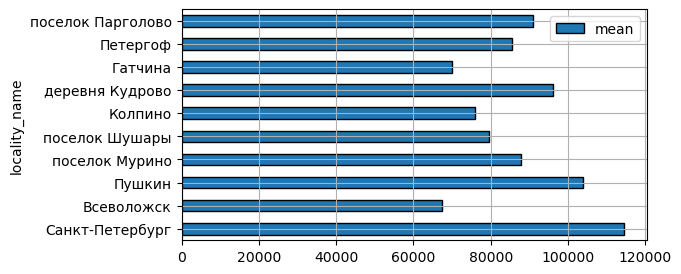

In [85]:
temp_data.plot(kind='barh', y='mean', legend=True, grid=True, ec='black', figsize=(6, 3));

**Вывод**<br>
Наибольшая стоимость объекта за квадратный метр в городе Санкт-Питербург около 113 тыс.руб. за $м^2$. <br>
Наименьшая стоимость объекта за квадратный метр в городе Выборг около 58 тыс.руб. за $м^2$. 

### 5.5. Зависимость стоимости объектов от расстояния до центра города Санкт-Петербург.
<a id="16"></a>
Задача: выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра, узнаем как стоимость объектов зависит от расстояния до центра города.

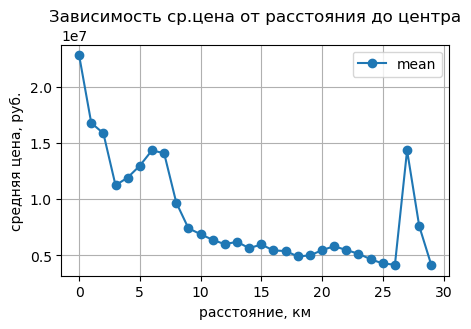

In [86]:
# Убираем выбросы из данных
temp_data = data[(data['last_price'] < 120000000) & (data['locality_name'] == 'Санкт-Петербург')]
# Строим сводную таблицу
temp_data = temp_data.groupby('city_centers_nearest_km')['last_price'].agg(['mean'])
temp_data= temp_data.reset_index()

# Просмотр таблицы
# display(temp_data.style.format('{:.2f}'))

# Строим график
temp_data.plot(x='city_centers_nearest_km', y='mean', style='-o', figsize=(5,3), grid=True)
plt.title('Зависимость ср.цена от расстояния до центра')
plt.xlabel('расстояние, км')
plt.ylabel('средняя цена, руб.');

**Вывод**<br>
При удалении от центра города средняя цена объекта недвижимости уменьшается. До 10км от центра цена резко падается с кажным километром, после 10км цена начинает снижается очень плавно, выходя на плато.

## Общий вывод.
<a id="17"></a>

Проведено исследование объявлений о продаже квартир, в ходе исследования выполнено:
1. Была получена первоначальная информация по датасету (см. [2. Первичный анализ данных -> Вывод](#11)).
2. Обнаружены пропуски, неверные типы данных, дубликаты и аномалии в датасете. Была проведена работа по заполнению пропусков. Изменены типы данных. Аномалии и дубликаты обработаны (см.[3. Предобработка данных -> Вывод](#8)).
3. В датафрейм добавлены новые показатели (см. [4. Расчет дополнительных параметров -> Вывод](#17)).
4. Проведен исследовательский анализ данных.

**Исследовательский анализ данных:** <br> 

<u>**Сделаны графики зависимости стоимости объекта недвижимости от рассматриваемых показателей и найден коэффициент корреляции:**</u>

**Зависимость стоимости от общей площади, жилой площади, площади кухни**<br> 
коэффициент корреляции Пирсона (общая площадь): 0.647<br> 
коэффициент корреляции Пирсона (жилая площадь): 0.411<br> 
коэффициент корреляции Пирсона (площадь кухни): 0.468<br> 
Во всех случаях имеет место слабая положительная связь, чем больше площадь квартиры, тем больше ее стоимость. Больше всего на стоимость объекта влияет общая площадь квартиры.

**Зависимость стоимости от количества комнат**<br> 
коэффициент корреляции Пирсона (общая площадь): 0.389<br> 
Имеет место слабая положительная связь, чем больше комнат в квартире, тем больше ее стоимость.

**Зависимость стоимости от типа этажа**<br> 
Первый этаж является наименее дорогим. Последние этажи дороже первых, но в среднем не намного. Более дорогими являются другие этажи.

**Зависимость стоимости от дня недели, месяца, года публикации объявления**<br> 
Связи нет, параметры даты не влияют на стоимость квартиры (или можно предположить о наличии нелинейной связи).

<u>**Найден топ 10 населенных пунктов по количеству объявлений, для него посчитана средняя цена одного квадратного метра.**</u>

<div> 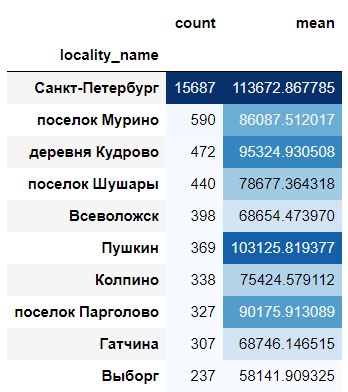 </div><br><br><br>
<div> 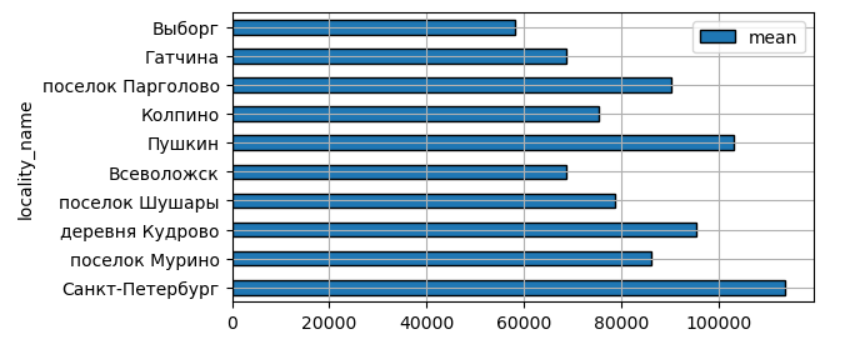 </div>

Наибольшая стоимость объекта за квадратный метр в городе Санкт-Питербург около 113 тыс.руб. за $м^2$. <br>
Наименьшая стоимость объекта за квадратный метр в городе Выборг около 58 тыс.руб. за $м^2$. 

<u>**Определена зависимость стоимости объектов от расстояния до центра города (по городу Санкт-Петербург).**</u><br>
При удалении от центра города средняя цена объекта недвижимости уменьшается. До 10км от центра цена резко падается с кажным километром, после 10км цена начинает снижается очень плавно, выходя на плато.

<div> 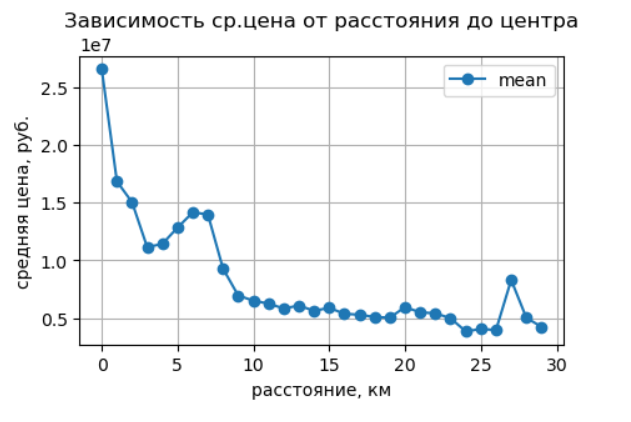 </div>

**Итоги:** 

**Наибольшее влияние на стоимость квартиры оказывает её площадь**, чем больше площадь квартиры, тем выше её стоимость. Также на стоимость квартиры влияет количество комнат, чем больше комнат, тем выше стоимость. На стоимость квартиры также влияет расстояние до центра города, чем ближе квартира располагается к центру, тем выше ее стоимость.

**Ожидаемое время продажи объекта недвижимости**: 45-232 дней. Можно считать, что объявления снятые в первые 45 дней - являются быстрыми, а те, что держатся больше 500 дней - необычно долгими. Большая часть объявлений была размещена 45 дней. Объявления, которые остаются более 90 дней редкость. На гистограмме наблюдались скачки: 7, 30, 45, 60, 90 дней. Обратившись к <a href='https://yandex.ru/support/realty/agency/home/add-ads-housing.html'>Яндекс справке</a> становится понятно, что это стандартные сроки публикации объявления для разных типов недвижимости.

В топ-10 населенных пунктов по количеству объявлений:<br>
**Наибольшая средняя стоимость квадратного метра в Санкт-Петербурге** - 111 722 руб./м².<br>
**Наименьшая средняя стоимость квадратного метра в Выборге** - 57 011 руб./м².